In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import seaborn as sns
from sklearn import cluster
import cluster_tools as ct
from sklearn.cluster import KMeans
import sklearn.metrics as skmet




In [2]:
def read_file(file_path):
    data = pd.read_csv(file_path)
    # Perform further operations with the data
    return data

# Example usage
file_path = r"C:\Users\Diraj\Downloads\API.csv"
data = read_file(file_path)

In [3]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN


In [4]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [5]:
data1 = data[data['Indicator Name'] == 'Population growth (annual %)']
data2 = data[data['Indicator Name'] == 'CO2 emissions from liquid fuel consumption (kt)']
data3 = data[data['Indicator Name'] == 'Electric power consumption (kWh per capita)']
data4 = data[data['Indicator Name'] == 'Methane emissions (kt of CO2 equivalent)']

In [6]:
data1 = data1.drop(["Indicator Code","Indicator Name","Country Code","2021","2020"],axis=1)
data1= data1.replace(np.NaN, 0)
u = ["Benin", "Bangladesh", "Bahrain", "Brazil", "Colombia", "Canada"]
dt = data1["Country Name"].isin(u)
data1= data1[dt]
data1

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1372,Benin,0.0,1.537781,1.636186,1.712017,1.785910,1.852837,1.911512,1.956500,2.001091,...,2.934927,2.928111,2.915012,2.899921,2.926229,2.951249,2.949828,2.946322,2.922392,2.887074
1524,Bangladesh,0.0,2.906641,2.997805,3.007812,3.004376,2.994281,2.972633,3.006246,2.999689,...,1.141551,1.218939,1.243571,1.267157,1.245960,1.191061,1.230795,1.249724,1.161378,1.113172
1676,Bahrain,0.0,3.833089,3.755043,3.698652,3.654651,3.385474,3.064793,2.919984,2.831442,...,2.857746,-0.129281,1.055563,2.954757,3.845379,3.816605,3.429079,3.291634,2.072370,0.459363
2208,Brazil,0.0,3.015260,2.967878,2.941316,2.894841,2.829600,2.745504,2.659227,2.581562,...,0.939418,0.928590,0.900343,0.868346,0.857835,0.845993,0.811256,0.792263,0.793768,0.766108
2664,Canada,0.0,1.999185,1.859888,1.862846,1.885715,1.810167,1.862814,1.799357,1.613409,...,1.111864,0.978698,1.085817,1.056591,1.005338,0.746339,1.132349,1.199521,1.412456,1.436137
3424,Colombia,0.0,3.104890,3.096145,3.065961,3.026195,2.977044,2.888489,2.791684,2.695674,...,1.126885,1.093583,1.039665,0.990035,0.947137,0.941994,1.068612,1.512290,1.895587,1.830747


In [7]:
d_t = np.transpose(data1)
d_t = d_t.reset_index()
d_t = d_t.rename(columns= d_t.iloc[0])
d_t = d_t.drop(0,axis=0)
d_t = d_t.rename(columns={"Country Name":"Year"})

d_t["Year"] = pd.to_numeric(d_t["Year"])
d_t["Bahrain"] = pd.to_numeric(d_t["Bahrain"])
d_t["Brazil"] = pd.to_numeric(d_t["Brazil"])
d_t["Canada"] = pd.to_numeric(d_t["Canada"])
d_t["Colombia"] = pd.to_numeric(d_t["Colombia"])
d_t["Bangladesh"] = pd.to_numeric(d_t["Bangladesh"])
d_t = d_t.dropna()

d_t

,Year,Benin,Bangladesh,Bahrain,Brazil,Canada,Colombia
1,1960,0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1961,1.53778,2.906641,3.833089,3.015260,1.999185,3.104890
3,1962,1.63619,2.997805,3.755043,2.967878,1.859888,3.096145
4,1963,1.71202,3.007812,3.698652,2.941316,1.862846,3.065961
5,1964,1.78591,3.004376,3.654651,2.894841,1.885715,3.026195
6,1965,1.85284,2.994281,3.385474,2.829600,1.810167,2.977044
7,1966,1.91151,2.972633,3.064793,2.745504,1.862814,2.888489
8,1967,1.9565,3.006246,2.919984,2.659227,1.799357,2.791684
9,1968,2.00109,2.999689,2.831442,2.581562,1.613409,2.695674
10,1969,2.04525,2.882102,2.758089,2.522098,1.359783,2.581860


In [8]:
data2 = data2.drop(["Indicator Code","Indicator Name","Country Code","2021","2020"],axis=1)
data2= data2.replace(np.NaN, 0)
dt2 = data2["Country Name"].isin(u)
data2= data2[dt2]
data2

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1411,Benin,161.348,128.345,135.679,121.011,143.013,150.347,113.677,143.013,154.014,...,4440.737,4330.727,4110.707,4334.394,4495.742,5060.460,5258.478,0.0,0.0,0.0
1563,Bangladesh,6552.929,6857.290,7521.017,8958.481,9068.491,9787.223,10498.621,11151.347,13164.530,...,10850.653,13410.219,14891.687,13971.270,15797.436,14701.003,15449.071,0.0,0.0,0.0
1715,Bahrain,575.719,1771.161,1591.478,1100.100,1499.803,1133.103,535.382,891.081,586.720,...,4118.041,3894.354,2464.224,4558.081,2343.213,3982.362,3802.679,0.0,0.0,0.0
2247,Brazil,39049.883,41503.106,44865.745,46948.601,47040.276,45800.830,51899.051,53769.221,64033.154,...,273884.563,289139.283,309527.803,325988.966,342754.490,317125.827,296990.330,0.0,0.0,0.0
2703,Canada,115836.863,118759.462,126390.489,134380.882,143838.075,151872.472,155953.843,171630.268,179349.303,...,250892.473,244830.922,241970.662,242084.339,253327.361,269326.482,252538.956,0.0,0.0,0.0
3463,Colombia,7939.055,9204.170,9515.865,10476.619,10967.997,11210.019,12306.452,12335.788,14297.633,...,35727.581,35368.215,38947.207,45514.804,42397.854,43959.996,49196.472,0.0,0.0,0.0


In [9]:
trans2 = np.transpose(data2)
trans2 = trans2.reset_index()
trans2 = trans2.rename(columns= trans2.iloc[0])
trans2 = trans2.drop(0,axis=0)
trans2 = trans2.rename(columns={"Country Name":"Year"})

trans2["Year"] = pd.to_numeric(trans2["Year"])
trans2["Bahrain"] = pd.to_numeric(trans2["Bahrain"])
trans2["Brazil"] = pd.to_numeric(trans2["Brazil"])
trans2["Canada"] = pd.to_numeric(trans2["Canada"])
trans2["Colombia"] = pd.to_numeric(trans2["Colombia"])
trans2["Bangladesh"] = pd.to_numeric(trans2["Bangladesh"])
trans2 = trans2.dropna()

trans2

,Year,Benin,Bangladesh,Bahrain,Brazil,Canada,Colombia
1,1960,161.348,6552.929,575.719,39049.883,115836.863,7939.055
2,1961,128.345,6857.290,1771.161,41503.106,118759.462,9204.170
3,1962,135.679,7521.017,1591.478,44865.745,126390.489,9515.865
4,1963,121.011,8958.481,1100.100,46948.601,134380.882,10476.619
5,1964,143.013,9068.491,1499.803,47040.276,143838.075,10967.997
6,1965,150.347,9787.223,1133.103,45800.830,151872.472,11210.019
7,1966,113.677,10498.621,535.382,51899.051,155953.843,12306.452
8,1967,143.013,11151.347,891.081,53769.221,171630.268,12335.788
9,1968,154.014,13164.530,586.720,64033.154,179349.303,14297.633
10,1969,201.685,11653.726,678.395,69478.649,181677.848,14554.323


In [10]:
d_t.columns

Index(['Year', 'Benin', 'Bangladesh', 'Bahrain', 'Brazil', 'Canada',
       'Colombia'],
      dtype='object')

In [11]:
data3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
50,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Africa Eastern and Southern,AFE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,697.657989,691.958507,680.150341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,Africa Western and Central,AFW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,182.722163,178.422404,183.440206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,218.553922,278.808255,310.081668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19886,Kosovo,XKX,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,2859.821173,2917.304002,2818.337231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19962,"Yemen, Rep.",YEM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,180.869057,233.879319,204.516190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20038,South Africa,ZAF,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,4340.367989,4270.810409,4183.827490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20114,Zambia,ZMB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,719.311360,731.934202,701.940863,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data3 = data3.drop(["Indicator Code","Indicator Name","Country Code",'2018','2019',"2021","2020"],axis=1)
data3= data3.replace(np.NaN, 0)
dt3 = data3["Country Name"].isin(u)
data3= data3[dt3]

trans3 = np.transpose(data3)
trans3 = trans3.reset_index()
trans3 = trans3.rename(columns= trans3.iloc[0])
trans3 = trans3.drop(0,axis=0)
trans3 = trans3.rename(columns={"Country Name":"Year"})

trans3["Year"] = pd.to_numeric(trans3["Year"])
trans3["Bahrain"] = pd.to_numeric(trans3["Bahrain"])
trans3["Brazil"] = pd.to_numeric(trans3["Brazil"])
trans3["Canada"] = pd.to_numeric(trans3["Canada"])
trans3["Colombia"] = pd.to_numeric(trans3["Colombia"])
trans3["Bangladesh"] = pd.to_numeric(trans3["Bangladesh"])
trans3 = trans3.dropna()

trans3

,Year,Benin,Bangladesh,Bahrain,Brazil,Canada,Colombia
1,1960,0,0.000000,0.000000,0.000000,5630.520718,0.000000
2,1961,0,0.000000,0.000000,0.000000,5605.111926,0.000000
3,1962,0,0.000000,0.000000,0.000000,5791.124960,0.000000
4,1963,0,0.000000,0.000000,0.000000,5966.040920,0.000000
5,1964,0,0.000000,0.000000,0.000000,6468.926261,0.000000
6,1965,0,0.000000,0.000000,0.000000,6909.899380,0.000000
7,1966,0,0.000000,0.000000,0.000000,7359.088188,0.000000
8,1967,0,0.000000,0.000000,0.000000,7630.168528,0.000000
9,1968,0,0.000000,0.000000,0.000000,8030.418434,0.000000
10,1969,0,0.000000,0.000000,0.000000,8532.908503,0.000000


In [13]:
data3

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1418,Benin,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,84.320734,85.690793,92.952250,89.036209,90.472633,93.900995,97.128135,0.0,0.0,0.0
1570,Bangladesh,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,205.932668,224.843005,245.904171,263.981990,281.443996,299.480350,317.245370,0.0,0.0,0.0
1722,Bahrain,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,18562.732420,17542.877930,18442.790110,18889.063980,18942.167730,19483.653850,19969.736120,0.0,0.0,0.0
2254,Brazil,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2222.415792,2189.997778,2366.380120,2422.576221,2492.837864,2560.095560,2610.999282,0.0,0.0,0.0
2710,Canada,5630.520718,5605.111926,5791.12496,5966.04092,6468.926261,6909.89938,7359.088188,7630.168528,8030.418434,...,16377.479700,15450.730690,15269.745480,15644.540280,15336.624860,15750.811630,15588.487150,0.0,0.0,0.0
3470,Colombia,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,998.372418,1076.095349,1104.491269,1148.560242,1177.569983,1317.965575,1320.345130,0.0,0.0,0.0


In [14]:
data4 = data4.drop(["Indicator Code","Indicator Name","Country Code","2021","2020"],axis=1)
data4= data4.replace(np.NaN, 0)
dt4 = data4["Country Name"].isin(u)
data4= data4[dt4]

trans4 = np.transpose(data4)
trans4 = trans4.reset_index()
trans4 = trans4.rename(columns= trans4.iloc[0])
trans4 = trans4.drop(0,axis=0)
trans4 = trans4.rename(columns={"Country Name":"Year"})

trans4["Year"] = pd.to_numeric(trans4["Year"])
trans4["Bahrain"] = pd.to_numeric(trans4["Bahrain"])
trans4["Brazil"] = pd.to_numeric(trans4["Brazil"])
trans4["Canada"] = pd.to_numeric(trans4["Canada"])
trans4["Colombia"] = pd.to_numeric(trans4["Colombia"])
trans4["Bangladesh"] = pd.to_numeric(trans4["Bangladesh"])
trans4 = trans4.dropna()

trans4

,Year,Benin,Bangladesh,Bahrain,Brazil,Canada,Colombia
1,1960,0,0.00000,0.000000,0.0000,0.00000,0.00000
2,1961,0,0.00000,0.000000,0.0000,0.00000,0.00000
3,1962,0,0.00000,0.000000,0.0000,0.00000,0.00000
4,1963,0,0.00000,0.000000,0.0000,0.00000,0.00000
5,1964,0,0.00000,0.000000,0.0000,0.00000,0.00000
6,1965,0,0.00000,0.000000,0.0000,0.00000,0.00000
7,1966,0,0.00000,0.000000,0.0000,0.00000,0.00000
8,1967,0,0.00000,0.000000,0.0000,0.00000,0.00000
9,1968,0,0.00000,0.000000,0.0000,0.00000,0.00000
10,1969,0,0.00000,0.000000,0.0000,0.00000,0.00000


In [47]:
Brazil = pd.DataFrame()
Brazil["Year"] = d_t["Year"]
Brazil["Population growth"] = d_t["Brazil"]
Brazil["co2_emission"] = trans2["Brazil"]
Brazil["Electric_power_consumption"] = trans3["Brazil"]
Brazil["Methane emissions"] = trans4["Brazil"]
Brazil = Brazil.iloc[1:57,:]

In [48]:
Canada = pd.DataFrame()
Canada["Year"] = d_t["Year"]
Canada["Population growth"] = d_t["Canada"]
Canada["co2_emission"] = trans2["Canada"]
Canada["Electric_power_consumption"] = trans3["Canada"]
Canada["Methane emissions"] = trans4["Canada"]
Canada = Canada.iloc[1:57,:]

In [49]:
Canada.size

280

In [50]:
def set_mat(country):
    pd.plotting.scatter_matrix(country, figsize=(14.0, 12.0))
    plt.tight_layout()
    plt.savefig("scattermatrix.png")
    plt.show()

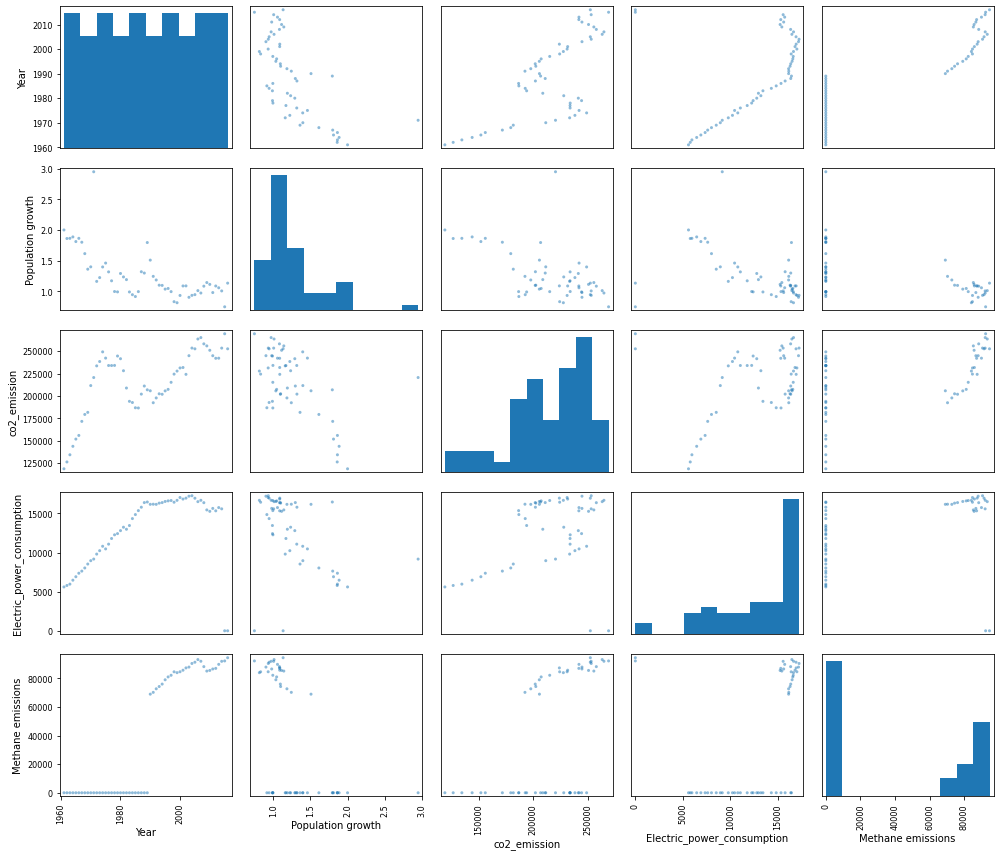

In [51]:
set_mat(Canada)

In [20]:
# extract columns for fitting. 
# .copy() prevents changes in df_fit to affect df_fish.
df = Brazil[["Electric_power_consumption", "co2_emission"]].copy()

# normalise dataframe and inspect result
# normalisation is done only on the extract columns. .copy() prevents
# original measurements
print(df.describe())
print()

print("n   score")
# loop over trial numbers of clusters calculating the silhouette
for ic in range(2, 7):
    # set up kmeans and fit
    kmeans = cluster.KMeans(n_clusters=ic)
    kmeans.fit(df)     

    # extract labels and calculate silhoutte score
    labels = kmeans.labels_
    print (ic, skmet.silhouette_score(df, labels))

       Electric_power_consumption   co2_emission
count                   56.000000      56.000000
mean                  1189.555280  168693.066482
std                    820.431499   81030.773607
min                      0.000000   41503.106000
25%                    533.438347  124244.377250
50%                   1346.303377  151148.239500
75%                   1802.962604  231661.808250
max                   2610.999282  342754.490000

n   score
2 0.6462989930311104
3 0.6740289982546191
4 0.7056328334628302
5 0.6407578619899071
6 0.6143331389805908


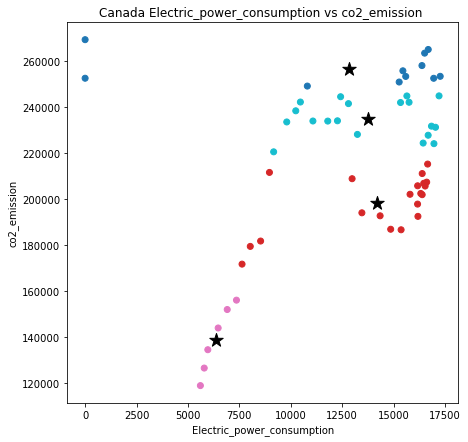

In [52]:
cepc = np.array(Canada["Electric_power_consumption"]).reshape(-1,1)
cco2 = np.array(Canada["co2_emission"]).reshape(-1,1)

cl = np.concatenate((cepc,cco2),axis=1)
nc=4
# fitting the model
kmeans = cluster.KMeans(n_clusters=nc)
kmeans.fit(cl)
# assignining the label
label = kmeans.labels_
# finding the centers for cluster
km_c = kmeans.cluster_centers_
col = ["Electric_power_consumption",'co2_emission']
labels = pd.DataFrame(label,columns=['Cluster ID'])
result = pd.DataFrame(cl,columns=col)
# concat result and labels
res = pd.concat((result,labels),axis=1)
# plotting the cluster
plt.figure(figsize=(7.0, 7.0))
plt.title("Canada Electric_power_consumption vs co2_emission ")
plt.scatter(res["Electric_power_consumption"],res["co2_emission"],c=label,cmap="tab10")
plt.scatter(km_c[:,0],km_c[:,1], marker="*",c="black",s=200)
plt.xlabel("Electric_power_consumption")
plt.ylabel("co2_emission")
# plotting centers of clusters
plt.savefig("scattercanada.png")
plt.show()

In [22]:

epc = np.array(Brazil["Electric_power_consumption"]).reshape(-1,1)
co2 = np.array(Brazil["co2_emission"]).reshape(-1,1)

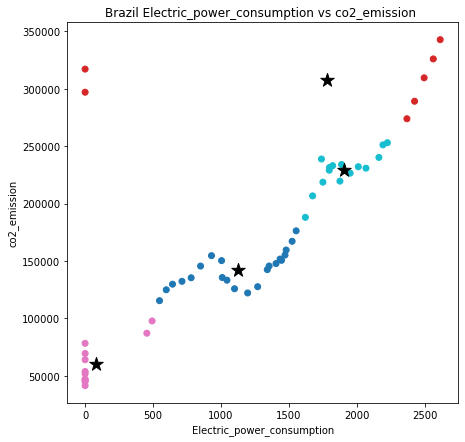

In [53]:
cl = np.concatenate((epc,co2),axis=1)
nc=4
# fitting the model
kmeans = cluster.KMeans(n_clusters=nc)
kmeans.fit(cl)
# assignining the label
label = kmeans.labels_
# finding the centers for cluster
km_c = kmeans.cluster_centers_
col = ["Electric_power_consumption",'co2_emission']
labels = pd.DataFrame(label,columns=['Cluster ID'])
result = pd.DataFrame(cl,columns=col)
# concat result and labels
res = pd.concat((result,labels),axis=1)
# plotting the cluster
plt.figure(figsize=(7.0, 7.0))
plt.title("Brazil Electric_power_consumption vs co2_emission ")
plt.scatter(res["Electric_power_consumption"],res["co2_emission"],c=label,cmap="tab10")
plt.scatter(km_c[:,0],km_c[:,1], marker="*",c="black",s=200)
plt.xlabel("Electric_power_consumption")
plt.ylabel("co2_emission")
# plotting centers of clusters
plt.savefig("scatterbrazil.png")
plt.show()

In [63]:
Canada["NORM_CO2_emission"] = Canada["co2_emission"]/Canada["co2_emission"].abs().max()
Canada

,Year,Population growth,co2_emission,Electric_power_consumption,Methane emissions,NORM_CO2_emission
2,1961,1.999185,118759.462,5605.111926,0.00000,0.440950
3,1962,1.859888,126390.489,5791.124960,0.00000,0.469284
4,1963,1.862846,134380.882,5966.040920,0.00000,0.498952
5,1964,1.885715,143838.075,6468.926261,0.00000,0.534066
6,1965,1.810167,151872.472,6909.899380,0.00000,0.563897
7,1966,1.862814,155953.843,7359.088188,0.00000,0.579051
8,1967,1.799357,171630.268,7630.168528,0.00000,0.637257
9,1968,1.613409,179349.303,8030.418434,0.00000,0.665918
10,1969,1.359783,181677.848,8532.908503,0.00000,0.674564
11,1970,1.397832,211545.563,8962.202213,0.00000,0.785461


In [55]:
Brazil["NORM_CO2_emission"] = Brazil["co2_emission"]/Brazil["co2_emission"].abs().max()
Brazil

,Year,Population growth,co2_emission,Electric_power_consumption,Methane emissions,NORM_CO2_emission
2,1961,3.015260,41503.106,0.000000,0.0000,0.121087
3,1962,2.967878,44865.745,0.000000,0.0000,0.130898
4,1963,2.941316,46948.601,0.000000,0.0000,0.136974
5,1964,2.894841,47040.276,0.000000,0.0000,0.137242
6,1965,2.829600,45800.830,0.000000,0.0000,0.133626
7,1966,2.745504,51899.051,0.000000,0.0000,0.151418
8,1967,2.659227,53769.221,0.000000,0.0000,0.156874
9,1968,2.581562,64033.154,0.000000,0.0000,0.186819
10,1969,2.522098,69478.649,0.000000,0.0000,0.202707
11,1970,2.489482,78316.119,0.000000,0.0000,0.228490


In [59]:
import numpy as np


def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p, s in zip(param, sigma):
        nmin = p - s
        nmax = p + s
        uplow.append((nmin, nmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y) 
        upper = np.maximum(upper, y) 
        
    return lower, upper   

In [60]:
def poly(t, p0, p1, p2, p3):
    """ Computes a polynominal c0 + c1*t + c2*t^2 + c3*t^3
    """
    t = t - 1990
    f = p0 + p1*t + p2*t**2 + p3*t**3
    return f

Fit parameter [4.89914215e-01 1.11841940e-02 1.02436313e-04 6.75240944e-06]


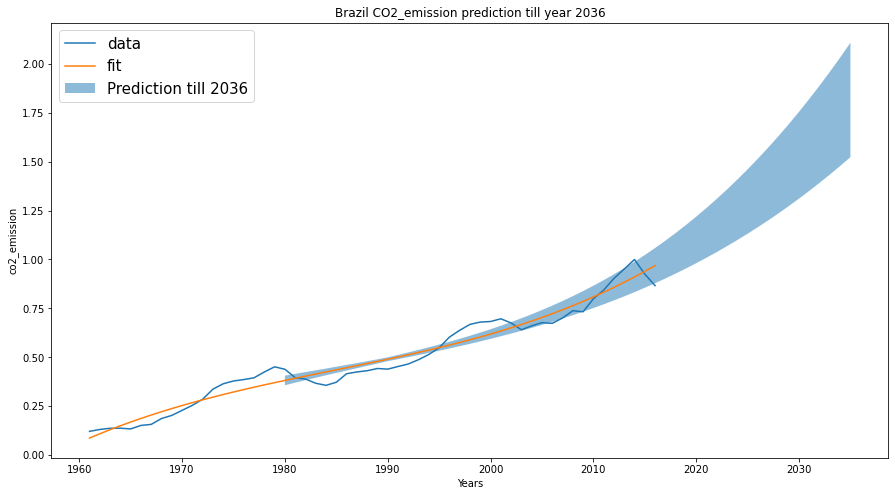

In [71]:
pop,corr = opt.curve_fit(poly, Brazil["Year"],Brazil["NORM_CO2_emission"])
print("Fit parameter", pop)
# extract variances and calculate sigmas
sig = np.sqrt(np.diag(corr))
# call function to calculate upper and lower limits with extrapolation
# create extended year range
years = np.arange(1980, 2036)
lower, upper = err_ranges(years, poly, pop, sig)
Brazil["poly"] = poly(Brazil["Year"], *pop)
plt.figure(figsize=(15,8))
plt.title("Brazil CO2_emission prediction till year 2036")
plt.plot(Brazil["Year"], Brazil["NORM_CO2_emission"], label="data")
plt.plot(Brazil["Year"], Brazil["poly"], label="fit")
#Labels for x and y axis
plt.xlabel("Years")
plt.ylabel("co2_emission")
# plot error ranges with transparency
plt.fill_between(years, lower, upper, alpha=0.5,label='Prediction till 2036')
plt.legend(loc="upper left",fontsize=15)
plt.savefig("brazil_fit.png")
plt.show()

Fit parameter [ 8.18906518e-01 -2.05525737e-03 -5.75037547e-06  1.66191607e-05]


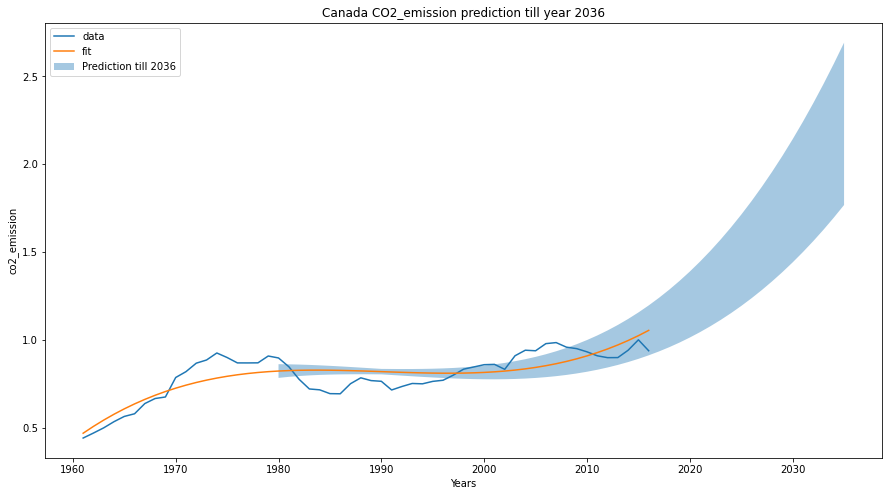

In [74]:
popt, pcorr = opt.curve_fit(poly, Canada["Year"],Canada["NORM_CO2_emission"])
print("Fit parameter", popt)
# extract variances and calculate sigmas
sigmas = np.sqrt(np.diag(pcorr))
# call function to calculate upper and lower limits with extrapolation
# create extended year range
years = np.arange(1980, 2036)
lower, upper = err_ranges(years, poly, popt, sigmas)
Canada["poly"] = poly(Canada["Year"], *popt)
plt.figure(figsize=(15,8))
plt.title("Canada CO2_emission prediction till year 2036")
plt.plot(Canada["Year"], Canada["NORM_CO2_emission"], label="data")
plt.plot(Canada["Year"], Canada["poly"], label="fit")
#Labels for x and y axis
plt.xlabel("Years")
plt.ylabel("co2_emission")
# plot error ranges with transparency
plt.fill_between(years, lower, upper, alpha=0.4,label='Prediction till 2036')
plt.legend(loc="upper left")
plt.savefig("canada_fit.png")
plt.show()

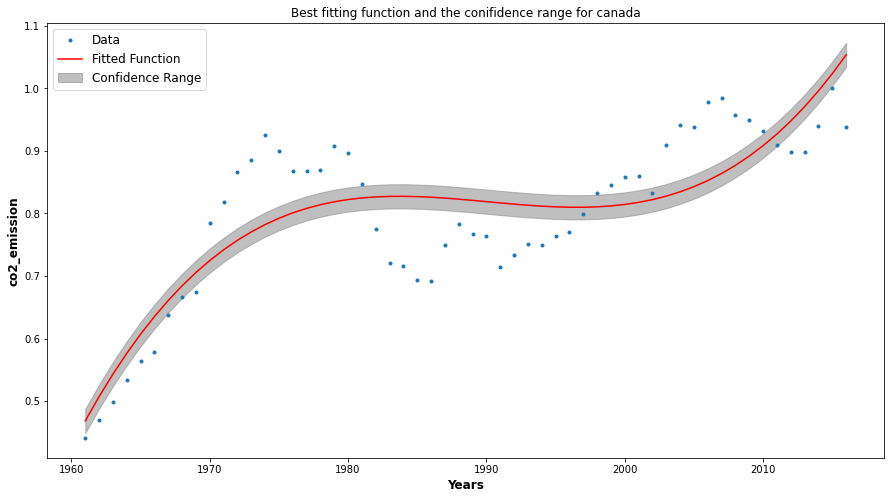

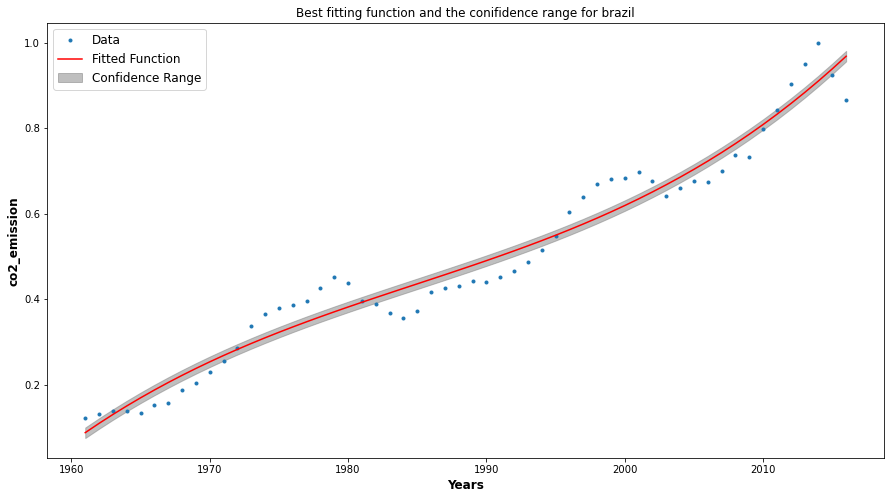

In [73]:
def cubic(x, a, b, c, d):
    """Returns cubic function a*x^3 + b*x^2 + c*x + d"""
    
    f = a*x**3 + b*x**2 + c*x + d
    
    return f

#To plot the best fitting function and the conifidence range for canada

param, covar = opt.curve_fit(cubic, Canada["Year"],Canada["NORM_CO2_emission"])
# create monotonic x-array for plotting
x = Canada["Year"]
y = cubic(Canada["Year"], *param)
y_pred = poly(Canada["Year"], *popt)

# Calculate the confidence range
y_err = Canada["NORM_CO2_emission"] - y_pred
mse = np.mean(y_err ** 2)
n = len(x)
conf_interval = 1.96 * np.sqrt(mse / n)  # 1.96 for 95% confidence interval
plt.figure(figsize=(15,8))

plt.plot(Canada["Year"],Canada["NORM_CO2_emission"], "o", markersize=3, label="Data")
plt.plot(x, y,color='red', label='Fitted Function')
#Labels for x and y axis
plt.xlabel("Years", fontweight='bold',fontsize=12)
plt.ylabel("co2_emission", fontweight='bold',fontsize=12)
plt.fill_between(Canada["Year"], y_pred - conf_interval, y_pred + conf_interval, color='gray', alpha=0.5, label='Confidence Range')
plt.title("Best fitting function and the conifidence range for canada",fontsize=12)
plt.legend(fontsize=12)
plt.savefig("canada.png")
plt.show()

#To plot the best fitting function and the conifidence range for Brazil
                                               
param, covar = opt.curve_fit(cubic, Brazil["Year"],Brazil["NORM_CO2_emission"])
# create monotonic x-array for plotting
x = Brazil["Year"]
y = cubic(Brazil["Year"], *param)
y_pred = poly(Brazil["Year"], *pop)

# Calculate the confidence range
y_err = Brazil["NORM_CO2_emission"] - y_pred
mse = np.mean(y_err ** 2)
n = len(x)
conf_interval = 1.96 * np.sqrt(mse / n)  # 1.96 for 95% confidence interval
# plotting the line graph
plt.figure(figsize=(15,8))
plt.plot(Brazil["Year"],Brazil["NORM_CO2_emission"], "o", markersize=3, label="Data")
plt.plot(x, y,color='red', label='Fitted Function')
#Labels for x and y axis
plt.xlabel("Years", fontweight='bold',fontsize=12)
plt.ylabel("co2_emission", fontweight='bold',fontsize=12)
plt.fill_between(Brazil["Year"], y_pred - conf_interval, y_pred + conf_interval, color='gray', alpha=0.5, label='Confidence Range')
plt.title("Best fitting function and the conifidence range for brazil",fontsize=12)
plt.legend(fontsize=12)
plt.savefig("brazil.png")
plt.show()